#  Pandas 基础快速了解和查询

[官方文档](https://pandas.pydata.org/docs/)

> Pandas 是 Python 的核心数据分析支持库, 基于 NumPy 创建, 它使 python 成为强大而高效的数据分析环境

## 一, 数据结构

pandas 的数据结构是基于 numpy 的, 因此其有着 numpy 的基因, 许多操作和大部分函数与 numpy 类似

pandas 的数据结构其实是 numpy 数组数据对象 array 的容器, 在 pandas 中有了索引结构, 可以利用索引来取 array 或 array 中的元素

pandas 中最重要的数据结构是 Series 和 DataFrame

### 1, 创建 Series 和 DataFrame

创建时若不指定索引, 将自动生成(从 0 开始)

Series 是一维, 只有行索引, 而 DataFrame 有行和列索引

创建方式灵活多变, 可以查看参数, 根据要求传参进行创建

In [ ]:
import numpy as np  
import pandas as pd  

s = pd.Series(range(3))
s

0    0
1    1
2    2
dtype: int64

In [ ]:
df = pd.DataFrame(range(3))  
df

   0
0  0
1  1
2  2


In [ ]:
s.values

array([0, 1, 2], dtype=int64)

In [ ]:
df.values

array([[0],
       [1],
       [2]], dtype=int64)

可见，pandas 的数据结构，是 numpy 的 array 对象的容器，着意味着 pandas 在处理数据时，可以使用 numpy 的所有函数和方法

In [ ]:
s = pd.Series(range(3), index=list('abc'))  
s

a    0
b    1
c    2
dtype: int64

In [ ]:
df = pd.DataFrame({'A': range(3), 'B': list('jkl')}, index=list('abc')) 
df  

   A  B
a  0  j
b  1  k
c  2  l


In [ ]:
dict_1 = {'a': 0, 'b': 1, 'c': 2}  
dict_2 = {'a': range(3), 'b': list('jkl')}  
s = pd.Series(dict_1)  
s

a    0
b    1
c    2
dtype: int64

In [ ]:
df1 = pd.DataFrame(dict_1, index=['A'])  
df1

   a  b  c
A  0  1  2


In [ ]:
df2 = pd.DataFrame(dict_2)  
df2  

   a  b
0  0  j
1  1  k
2  2  l


In [ ]:
# df2 每一列是一个类型的 array 对象
df2["a"].values, df2["b"].values

(array([0, 1, 2], dtype=int64), array(['j', 'k', 'l'], dtype=object))

### 2, Series 和 DataFrame 的常用属性

大部分属性和 numpy 一样

In [ ]:
s = pd.Series(1, index=list('abc'))  
s

a    1
b    1
c    1
dtype: int64

In [ ]:
dict_3 = {'a': range(3), 'b': list('jkl')}  
df = pd.DataFrame(dict_3)  
df  

   a  b
0  0  j
1  1  k
2  2  l


In [ ]:
# 查看形状, 形状不包括 索引  
s.shape, df.shape  

((3,), (3, 2))

In [ ]:
# 获取索引  
s.index, df.index, df.columns  

(Index(['a', 'b', 'c'], dtype='object'),
 RangeIndex(start=0, stop=3, step=1),
 Index(['a', 'b'], dtype='object'))

In [ ]:
# 查看元素个数  
s.size, df.size  

(3, 6)

In [ ]:
# 查看数据类型  
s.dtype, df.dtypes  

(dtype('int64'),
 a     int64
 b    object
 dtype: object)

In [ ]:
# 查看值  
s.values, df.values, df['a'].values  

(array([1, 1, 1], dtype=int64),
 array([[0, 'j'],
        [1, 'k'],
        [2, 'l']], dtype=object),
 array([0, 1, 2], dtype=int64))

### 3, Series 和 DataFrame 结构理解

从上述可以看出, pandas 数据结构的值, 是一个 array 对象. 对于 df, 每一列的值取出来也是一个 array 对象,
并且每一列可以是不同的数据类型

需要注意的是, DataFrame 每一列取出来, 整体是一个 Series , 因此 DataFrame 又可以看成 Series 的容器

In [ ]:
s = pd.Series(1, index=list('abc')) 
dict_3 = {'a': range(3), 'b': list('jkl')}  
df = pd.DataFrame(dict_3)  

type(s), type(df['a']), type(df)  

(pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame)

Series 和 DataFrame 可以有多层索引

In [ ]:
s.index = [['a', 'b', 'c'], [1, 2, 3]]
s

a  1    1
b  2    1
c  3    1
dtype: int64

In [ ]:
df.index = [['a', 'b', 'c'], [1, 2, 3]]  
df  

     a  b
a 1  0  j
b 2  1  k
c 3  2  l


## 二, 数据结构操作, 处理与计算

### 1, 查看 Series 和 DataFrame 数据信息常用方法

In [ ]:
a = np.random.randint(1, 9, (6, 2))  
s = pd.Series(a[:, 0])  
s

0    2
1    8
2    6
3    1
4    5
5    7
dtype: int32

In [ ]:
df = pd.DataFrame(a)  
df  

   0  1
0  2  6
1  8  6
2  6  7
3  1  3
4  5  5
5  7  3


In [ ]:
# 查看前 5 行(默认)  
s.head()  
df.head()  

   0  1
0  2  6
1  8  6
2  6  7
3  1  3
4  5  5


In [134]:
# 查看后 5 行(默认)  
s.tail()  
df.tail()  

,0,1
1,1,2
2,4,4
3,4,4
4,1,7
5,7,2


In [135]:
# 查看详情, Series 没有该方法  
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       6 non-null      int32
 1   1       6 non-null      int32
dtypes: int32(2)
memory usage: 176.0 bytes


In [136]:
# 查看统计量  
s.describe()  
df.describe()  

,0,1
count,6.00000,6.000000
mean,3.00000,4.000000
std,2.44949,1.897367
min,1.00000,2.000000
25%,1.00000,2.500000
50%,2.50000,4.000000
75%,4.00000,4.750000
max,7.00000,7.000000


### 2, 数据的直接计算

Series 和 DataFrame 的数据可以像 numpy 的数组一样直接进行计算, 索引相同的行、列进行计算, 索引不同的 NaN 填充

In [137]:
a = np.random.randint(1, 9, (6, 2))  
s = pd.Series(a[:, 0])  
df = pd.DataFrame(a)  

df

,0,1
0,1,2
1,4,1
2,2,3
3,8,5
4,1,8
5,6,6


In [138]:
df1 = pd.DataFrame(a, columns=[1, 'b'])  
df1 * df  

,0,1,b
0,NaN,2,NaN
1,NaN,4,NaN
2,NaN,6,NaN
3,NaN,40,NaN
4,NaN,8,NaN
5,NaN,36,NaN


In [139]:
s

0    1
1    4
2    2
3    8
4    1
5    6
dtype: int32

In [140]:
s1 = pd.Series(a[:, 0], index=['a', 1, 2, 3, 4, 5])  
s1

a    1
1    4
2    2
3    8
4    1
5    6
dtype: int32

In [141]:
s**2 + s1  

0     NaN
1    20.0
2     6.0
3    72.0
4     2.0
5    42.0
a     NaN
dtype: float64

In [142]:
# 笛卡儿积展开  
s + df

,0,1,2,3,4,5
0,2,6,NaN,NaN,NaN,NaN
1,5,5,NaN,NaN,NaN,NaN
2,3,7,NaN,NaN,NaN,NaN
3,9,9,NaN,NaN,NaN,NaN
4,2,12,NaN,NaN,NaN,NaN
5,7,10,NaN,NaN,NaN,NaN


### 3, Series 和 DataFrame 下标和索引切片操作

#### 3.01, Series 和 DataFrame 下标切片取值

Series 和 DataFrame 下标切片取值有许多不同之处

In [143]:
s1 = pd.Series(a[:, 0], index=['a', 1, 2, 3, 4, 5])  
s1

a    1
1    4
2    2
3    8
4    1
5    6
dtype: int32

In [144]:
a = np.random.randint(1, 9, (6, 2))  
df1 = pd.DataFrame(a, columns=[1, 'b'])  
df1 

,1,b
0,6,4
1,1,6
2,1,6
3,3,3
4,1,2
5,2,4


In [145]:
# 此方法 DataFrame 只能取行, 不能取列  
s1[1:3]

1    4
2    2
dtype: int32

In [146]:
df1[0:2]

,1,b
0,6,4
1,1,6


In [147]:
s1[[1, 4]]  

1    4
4    1
dtype: int32

**同 numpy 一样, 可以条件取值, 此方法常用来筛选和重新赋值等**

In [148]:
s1[s1>4]

3    8
5    6
dtype: int32

In [149]:
df1[df1>5]

,1,b
0,6.0,NaN
1,NaN,6.0
2,NaN,6.0
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN


In [151]:
df1[df1 == 4]  

,1,b
0,NaN,4.0
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,4.0


#### 3.02, Series 和 DataFrame 索引切片取值

索引切片取值, 左右都包含

In [152]:
s1 = pd.Series(a[:, 0], index=['a', 1, 2, 3, 4, 5])  
s1

a    6
1    1
2    1
3    3
4    1
5    2
dtype: int32

In [153]:
a = np.random.randint(1, 9, (6, 2))  
df1 = pd.DataFrame(a, columns=[1, 'b'])  
df1 

,1,b
0,3,1
1,6,3
2,5,4
3,5,2
4,3,7
5,4,2


In [154]:
# 需要将索引转换类型  
s1.index = s1.index.astype(str)  
df1.index = df1.index.astype(str) 

In [68]:
s1['a':'2']

a    7
1    4
2    4
dtype: int32

In [155]:
df1['1':'3']  

,1,b
1,6,3
2,5,4
3,5,2


In [156]:
df1['1':'3'][[1]]

,1
1,6
2,5
3,5


In [157]:
df1['b']

0    1
1    3
2    4
3    2
4    7
5    2
Name: b, dtype: int32

In [158]:
df1[['b', 1]]  

,b,1
0,1,3
1,3,6
2,4,5
3,2,5
4,7,3
5,2,4


#### 3.03, 用 iloc 方法取值(推荐)

上述的取值太复杂麻烦, iloc 方法传入下标取值更方便且条理清晰. 存在多层索引时, iloc 按最内层索引取值

In [172]:
s1 = pd.Series(a[:, 0], index=['a', 1, 2, 3, 4, 5])  
s1

a    7
1    7
2    1
3    4
4    7
5    4
dtype: int32

In [173]:
a = np.random.randint(1, 9, (6, 2))  
df1 = pd.DataFrame(a, columns=[1, 'b'])  
df1 

,1,b
0,2,3
1,7,5
2,1,1
3,8,6
4,5,2
5,4,3


In [174]:
# 右不包含  
s1.iloc[0:3]

a    7
1    7
2    1
dtype: int32

In [175]:
df1.iloc[0:5:2]

,1,b
0,2,3
2,1,1
4,5,2


In [176]:
df1.iloc[[1, 4, 2], 0:]  

,1,b
1,7,5
4,5,2
2,1,1


#### 3.04, 用 loc 方法

loc 方法取值左右都包含, 传入索引标签取值

In [177]:
s1 = pd.Series(a[:, 0], index=['a', 1, 2, 3, 4, 5])  
s1

a    2
1    7
2    1
3    8
4    5
5    4
dtype: int32

In [178]:
a = np.random.randint(1, 9, (6, 2))  
df1 = pd.DataFrame(a, columns=[1, 'b'])  
df1 

,1,b
0,2,5
1,8,1
2,6,4
3,5,7
4,5,8
5,6,7


In [179]:
# 需要将索引转换类型  
s1.index = s1.index.astype(str)  
df1.index = df1.index.astype(str) 

In [180]:
s1.loc['a':'2']

a    2
1    7
2    1
dtype: int32

In [181]:
df1.loc['1':'3', 'b']  

1    1
2    4
3    7
Name: b, dtype: int32

#### 3.05, 利用切片修改数据

利用切片修改数据, 其实就是取值重新赋值

In [182]:
import numpy as np  
import pandas as pd  

df = pd.DataFrame(np.random.rand(5, 4),  
                  index=list('abcde'),  
                  columns=list('ABCD'))  
df[df>0.5]  

,A,B,C,D
a,0.940108,0.712057,0.590876,NaN
b,NaN,NaN,0.814322,0.924557
c,0.755754,NaN,0.570401,NaN
d,NaN,NaN,0.685998,NaN
e,0.706809,NaN,NaN,NaN


In [183]:
# 将大于 0.5 的数据换成 nan  
df[df>0.5] = np.nan  
df  

,A,B,C,D
a,NaN,NaN,NaN,0.190052
b,0.06081,0.247148,NaN,NaN
c,NaN,0.054220,NaN,0.428699
d,0.19666,0.383167,NaN,0.007766
e,NaN,0.131174,0.454369,0.023789


In [184]:
# 将 A 列全部改成 1 , 增加一列 E, 值为 0  
df['A'] = 1 # 与 df.A = 1 等价  
df['E'] = 0  
df  

,A,B,C,D,E
a,1,NaN,NaN,0.190052,0
b,1,0.247148,NaN,NaN,0
c,1,0.054220,NaN,0.428699,0
d,1,0.383167,NaN,0.007766,0
e,1,0.131174,0.454369,0.023789,0


In [185]:
# 行列值互换  
df.loc[['a', 'c'], ['A', 'C']] = df.loc[['c', 'a'], ['C', 'A']].to_numpy()  
df  

,A,B,C,D,E
a,NaN,NaN,1.000000,0.190052,0
b,1.0,0.247148,NaN,NaN,0
c,NaN,0.054220,1.000000,0.428699,0
d,1.0,0.383167,NaN,0.007766,0
e,1.0,0.131174,0.454369,0.023789,0


In [186]:
# 只要 B 不为 nan 的数据  
df[df['B'] == df['B']]  

,A,B,C,D,E
b,1.0,0.247148,NaN,NaN,0
c,NaN,0.054220,1.000000,0.428699,0
d,1.0,0.383167,NaN,0.007766,0
e,1.0,0.131174,0.454369,0.023789,0


## 三, Series 和 DataFrame 的处理和计算函数

### 1, 索引

在 pandas 里, 索引非常重要, 一个行索引, 通常就是数据的一条记录(例如一个人的信息), 一个列索引就是数据的一个特征(例如某个人的性别, 年龄等),
通过索引能够更方便数据处理与计算

In [187]:
import numpy as np  
import pandas as pd  

s = pd.Series(np.random.rand(4), index=list('abcd'))  
s

a    0.457571
b    0.526583
c    0.938465
d    0.504608
dtype: float64

In [188]:
df = pd.DataFrame(np.random.rand(4, 4),  
                  index=list('abcd'),  
                  columns=list('ABCD'))  
df  

,A,B,C,D
a,0.729124,0.537375,0.599149,0.326118
b,0.733359,0.135174,0.992719,0.206860
c,0.567301,0.363325,0.972205,0.442598
d,0.443860,0.403646,0.435061,0.562946


**reindex 索引重排, 新增的索引 nan 填充, 缺少索引的数据舍弃**

In [189]:
# 新增 e 舍弃 d, 有许多参数可以调节  
s1 = s.reindex(list('bcae'))
s1

b    0.526583
c    0.938465
a    0.457571
e         NaN
dtype: float64

In [190]:
df2 = df.reindex(columns=list('BCAE'))  
df2

,B,C,A,E
a,0.537375,0.599149,0.729124,NaN
b,0.135174,0.992719,0.733359,NaN
c,0.363325,0.972205,0.567301,NaN
d,0.403646,0.435061,0.443860,NaN


**sort_index 索引排序**

In [191]:
# 默认 True 升序, 许多参数可调, DataFrame 只排行索引  
s2 = s.sort_index(ascending=False)
s2

d    0.504608
c    0.938465
b    0.526583
a    0.457571
dtype: float64

In [192]:
df2 = df.sort_index(ascending=False)  
df2

,A,B,C,D
d,0.443860,0.403646,0.435061,0.562946
c,0.567301,0.363325,0.972205,0.442598
b,0.733359,0.135174,0.992719,0.206860
a,0.729124,0.537375,0.599149,0.326118


**rename, set_index, reset_index 设置索引**

In [193]:
# 注意参数及传参方式  
s3 = s.rename(index={'a': 'f'})
s3

f    0.457571
b    0.526583
c    0.938465
d    0.504608
dtype: float64

In [194]:
df3 = df.rename(lambda x: x + x)  
df3

,A,B,C,D
aa,0.729124,0.537375,0.599149,0.326118
bb,0.733359,0.135174,0.992719,0.206860
cc,0.567301,0.363325,0.972205,0.442598
dd,0.443860,0.403646,0.435061,0.562946


In [195]:
# Series 没有此方法
df4 = df.set_index([['a','b','c','d'], [1, 2, 3, 4]])  
df4

,,A,B,C,D
a,1,0.729124,0.537375,0.599149,0.326118
b,2,0.733359,0.135174,0.992719,0.206860
c,3,0.567301,0.363325,0.972205,0.442598
d,4,0.443860,0.403646,0.435061,0.562946


In [196]:
# 可以将某列设为索引, 默认不保留原列, 可设参数 drop 保留  
df5 = df.set_index('A')  
df5  

,B,C,D
A,,,
0.729124,0.537375,0.599149,0.326118
0.733359,0.135174,0.992719,0.206860
0.567301,0.363325,0.972205,0.442598
0.443860,0.403646,0.435061,0.562946


In [198]:
# 将索引设为列(drop=True将其删除), 多层索引时可选某层  
df6 = df4.reset_index(level=1)
df6

,level_1,A,B,C,D
a,1,0.729124,0.537375,0.599149,0.326118
b,2,0.733359,0.135174,0.992719,0.206860
c,3,0.567301,0.363325,0.972205,0.442598
d,4,0.443860,0.403646,0.435061,0.562946


In [200]:
df7 = df5.reset_index()  
df7

,A,B,C,D
0,0.729124,0.537375,0.599149,0.326118
1,0.733359,0.135174,0.992719,0.206860
2,0.567301,0.363325,0.972205,0.442598
3,0.443860,0.403646,0.435061,0.562946


In [201]:
# 索引可以设置名字, 设置索引还可以通过获取索引重新赋值  
# DataFrame 还可以转置  
df5.index.name

'A'

In [202]:
df5.index = list('abcd') # 重设索引后, 索引名消失  
df5

,B,C,D
a,0.537375,0.599149,0.326118
b,0.135174,0.992719,0.206860
c,0.363325,0.972205,0.442598
d,0.403646,0.435061,0.562946


In [203]:
df5.T  

,a,b,c,d
B,0.537375,0.135174,0.363325,0.403646
C,0.599149,0.992719,0.972205,0.435061
D,0.326118,0.206860,0.442598,0.562946


**多层索引**

In [102]:
ar = [['a', 'b', 'c'], [1, 2, 3]]  
tup = list(zip(*ar))  
pd.MultiIndex.from_tuples(tup)  

MultiIndex([('a', 1),
            ('b', 2),
            ('c', 3)],
           )

In [103]:
index = pd.MultiIndex.from_product(ar)  
s = pd.Series(range(9), index=index)  
s  

a  1    0
   2    1
   3    2
b  1    3
   2    4
   3    5
c  1    6
   2    7
   3    8
dtype: int64

In [205]:
pd.MultiIndex.from_frame(pd.DataFrame(np.random.randint(1, 9, (2, 3))))  

MultiIndex([(7, 2, 2),
            (5, 7, 5)],
           names=[0, 1, 2])

### 2, 增删与合并数据

In [29]:
import numpy as np  
import pandas as pd  

df = pd.DataFrame(np.random.randint(1, 9, (4, 5)))  
df

,0,1,2,3,4
0,5,7,4,3,6
1,2,3,3,6,2
2,5,6,3,1,1
3,3,5,4,3,1


**insert 在指定位置前插入数据**

In [30]:
# Series 没有该方法  
df.insert(2, 'A', 1)  
df

,0,1,A,2,3,4
0,5,7,1,4,3,6
1,2,3,1,3,6,2
2,5,6,1,3,1,1
3,3,5,1,4,3,1


**append 增加数据**

In [31]:
df1 = pd.DataFrame(np.random.rand(4, 4),  
                  index=list('abcd'),  
                  columns=list('ABCD'))  
df1 

,A,B,C,D
a,0.217848,0.413009,0.660175,0.277329
b,0.283740,0.978112,0.555275,0.019218
c,0.652826,0.116753,0.437703,0.125342
d,0.126596,0.274218,0.211995,0.414557


**append 在数据最后增加数据**

In [32]:
# Series 只能传 Series  
df.iloc[0].append(pd.Series(8))  

0    5
1    7
A    1
2    4
3    3
4    6
0    8
dtype: int64

In [33]:
# DataFrame 可以在行后面增加, 也可在列后面新增  
df.append([1])

,0,1,A,2,3,4
0,5,7.0,1.0,4.0,3.0,6.0
1,2,3.0,1.0,3.0,6.0,2.0
2,5,6.0,1.0,3.0,1.0,1.0
3,3,5.0,1.0,4.0,3.0,1.0
0,1,NaN,NaN,NaN,NaN,NaN


In [34]:
df.append(df1, ignore_index=True)  

,0,1,A,2,3,4,B,C,D
0,5.0,7.0,1.000000,4.0,3.0,6.0,NaN,NaN,NaN
1,2.0,3.0,1.000000,3.0,6.0,2.0,NaN,NaN,NaN
2,5.0,6.0,1.000000,3.0,1.0,1.0,NaN,NaN,NaN
3,3.0,5.0,1.000000,4.0,3.0,1.0,NaN,NaN,NaN
4,NaN,NaN,0.217848,NaN,NaN,NaN,0.413009,0.660175,0.277329
5,NaN,NaN,0.283740,NaN,NaN,NaN,0.978112,0.555275,0.019218
6,NaN,NaN,0.652826,NaN,NaN,NaN,0.116753,0.437703,0.125342
7,NaN,NaN,0.126596,NaN,NaN,NaN,0.274218,0.211995,0.414557


**drop 删除指定数据**

In [38]:
df['A'].drop(1), df.drop(1, axis=1)  

(0    1
 2    1
 3    1
 Name: A, dtype: int64,
    0  A  2  3  4
 0  5  1  4  3  6
 1  2  1  3  6  2
 2  5  1  3  1  1
 3  3  1  4  3  1)

**concat 主要用于行索引的合并**

In [39]:
df

,0,1,A,2,3,4
0,5,7,1,4,3,6
1,2,3,1,3,6,2
2,5,6,1,3,1,1
3,3,5,1,4,3,1


In [40]:
df1

,A,B,C,D
a,0.217848,0.413009,0.660175,0.277329
b,0.283740,0.978112,0.555275,0.019218
c,0.652826,0.116753,0.437703,0.125342
d,0.126596,0.274218,0.211995,0.414557


In [41]:
# 默认按列索引合并, 保留合并后的全部索引, 缺失用 nan 填充  
# join 参数可控制合并的方式: inner 只留下都有的索引  
pd.concat([df, df1])

,0,1,A,2,3,4,B,C,D
0,5.0,7.0,1.000000,4.0,3.0,6.0,NaN,NaN,NaN
1,2.0,3.0,1.000000,3.0,6.0,2.0,NaN,NaN,NaN
2,5.0,6.0,1.000000,3.0,1.0,1.0,NaN,NaN,NaN
3,3.0,5.0,1.000000,4.0,3.0,1.0,NaN,NaN,NaN
a,NaN,NaN,0.217848,NaN,NaN,NaN,0.413009,0.660175,0.277329
b,NaN,NaN,0.283740,NaN,NaN,NaN,0.978112,0.555275,0.019218
c,NaN,NaN,0.652826,NaN,NaN,NaN,0.116753,0.437703,0.125342
d,NaN,NaN,0.126596,NaN,NaN,NaN,0.274218,0.211995,0.414557


In [ ]:
df2 = pd.DataFrame(np.random.rand(5, 4),  
                  index=list('abcde'),  
                  columns=list('BCDE'))  
df2 

,B,C,D,E
a,0.770402,0.808707,0.193931,0.717020
b,0.845173,0.229507,0.029163,0.083071
c,0.249733,0.977099,0.456456,0.959107
d,0.998443,0.172342,0.652720,0.440207
e,0.250738,0.562377,0.480203,0.539420


In [ ]:
pd.concat([df1, df2], join='inner')  

,B,C,D
a,0.413009,0.660175,0.277329
b,0.978112,0.555275,0.019218
c,0.116753,0.437703,0.125342
d,0.274218,0.211995,0.414557
a,0.770402,0.808707,0.193931
b,0.845173,0.229507,0.029163
c,0.249733,0.977099,0.456456
d,0.998443,0.172342,0.652720
e,0.250738,0.562377,0.480203


**join 主要用于行索引的合并**

In [230]:
# 默认以左边(df1)为基准, 相同列名需要加以区分  
# how 参数: outer 全保留, inner 只保留共同部分  
df1.join(df2, lsuffix='_1', rsuffix='_2')

,A,B_1,C_1,D_1,B_2,C_2,D_2,E
a,0.165578,0.112962,0.466099,0.829772,0.100222,0.801004,0.577052,0.746167
b,0.202298,0.322086,0.764868,0.500797,0.341367,0.370828,0.406333,0.204121
c,0.902621,0.444012,0.584891,0.487916,0.375709,0.925128,0.374178,0.172914
d,0.830701,0.456003,0.124871,0.451225,0.713358,0.545448,0.432237,0.315417


In [231]:
df1.join(df2, how='outer', lsuffix='_1', rsuffix='_2')  

,A,B_1,C_1,D_1,B_2,C_2,D_2,E
a,0.165578,0.112962,0.466099,0.829772,0.100222,0.801004,0.577052,0.746167
b,0.202298,0.322086,0.764868,0.500797,0.341367,0.370828,0.406333,0.204121
c,0.902621,0.444012,0.584891,0.487916,0.375709,0.925128,0.374178,0.172914
d,0.830701,0.456003,0.124871,0.451225,0.713358,0.545448,0.432237,0.315417
e,NaN,NaN,NaN,NaN,0.596971,0.246732,0.433229,0.701932


**merge 主要用于内容的合并, 常用于两者有相同内容的列**

In [44]:
df1 = pd.DataFrame({'K': ['K0', 'K1', 'K2', 'K3'],
                    'A': ['A0', 'A1', 'M2', 'M3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})
df1

,K,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,M2,B2
3,K3,M3,B3


In [45]:
df2 = pd.DataFrame({'K': ['K0', 'K1', 'K4', 'K5'],
                    'C': ['C0', 'C1', 'M2', 'M3'],
                    'D': ['D0', 'D1', 'D2', 'D3']})
df2

,K,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K4,M2,D2
3,K5,M3,D3


In [46]:
# 默认 inner, 全部列都保留,   
# 但只保留两者都有的列(K),且列内容相同(K0,K1)的 行, 行索引都舍弃  
pd.merge(df1, df2)

,K,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1


In [47]:
# 可以选择以某一个为基准, 需要合并的列内容, 以及保留某一个的索引  
pd.merge(df1, df2, how='left') # 以 df1 为准, 匹配不上的保留 df1  

,K,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,M2,B2,NaN,NaN
3,K3,M3,B3,NaN,NaN


In [48]:
# df1 的 A 列与 df2 的 C 列有内容相同需要合并  
pd.merge(df1, df2, left_on='A', right_on='C') 

,K_x,A,B,K_y,C,D
0,K2,M2,B2,K4,M2,D2
1,K3,M3,B3,K5,M3,D3


### 3, 数据选择与处理

In [ ]:
import numpy as np  
import pandas as pd  

np.random.seed(0)  
df = pd.DataFrame(np.random.randint(1, 9, (6, 6)),  
                  index=list('abcdef'),  
                  columns=list('ABCDEF'))  
df

,A,B,C,D,E,F
a,5,8,6,1,4,4
b,4,8,2,4,6,3
c,5,8,7,1,1,5
d,3,2,7,8,8,7
e,1,2,6,2,6,1
f,2,5,4,1,4,6


**sample 随机选择数据**

In [ ]:
# 可以指定数量, 也可以按比例选  
df.iloc[0].sample(2) # Series 也可  

E    4
B    8
Name: a, dtype: int32

In [ ]:
df.sample(3)

,A,B,C,D,E,F
a,5,8,6,1,4,4
b,4,8,2,4,6,3
c,5,8,7,1,1,5


In [ ]:
df.sample(frac=0.5, axis=1)  

,F,C,D
a,4,6,1
b,3,2,4
c,5,7,1
d,7,7,8
e,1,6,2
f,6,4,1


**where 按条件选择数据, 且可替换, 替换的是条件之外的数据**

In [ ]:
df.A.where(df.A>3) # Series 也可  

a    5.0
b    4.0
c    5.0
d    NaN
e    NaN
f    NaN
Name: A, dtype: float64

In [ ]:
df1 = df.where(df>1)  
df1

,A,B,C,D,E,F
a,5.0,8,6,NaN,4.0,4.0
b,4.0,8,2,4.0,6.0,3.0
c,5.0,8,7,NaN,NaN,5.0
d,3.0,2,7,8.0,8.0,7.0
e,NaN,2,6,2.0,6.0,NaN
f,2.0,5,4,NaN,4.0,6.0


In [ ]:
df.where(df==1, lambda x: x*x)  

,A,B,C,D,E,F
a,25,64,36,1,16,16
b,16,64,4,16,36,9
c,25,64,49,1,1,25
d,9,4,49,64,64,49
e,1,4,36,4,36,1
f,4,25,16,1,16,36


**isin 生成布尔数组来选择数据**

In [ ]:
values = [3, 5, 7, 'a', 'c']  
df.C.isin(values)

a    False
b    False
c     True
d     True
e    False
f    False
Name: C, dtype: bool

In [ ]:
df.A[df.C.isin(values)]  

c    5
d    3
Name: A, dtype: int32

In [ ]:
df[df.isin(values)]

,A,B,C,D,E,F
a,5.0,NaN,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN,NaN,3.0
c,5.0,NaN,7.0,NaN,NaN,5.0
d,3.0,NaN,7.0,NaN,NaN,7.0
e,NaN,NaN,NaN,NaN,NaN,NaN
f,NaN,5.0,NaN,NaN,NaN,NaN


In [ ]:
df[df.index.isin(values)]  

,A,B,C,D,E,F
a,5,8,6,1,4,4
c,5,8,7,1,1,5


**isna( isnull ) 和 notna ( notnull ) 生成布尔数组**

In [ ]:
# 可以 pd 调用, 也可 DataFrame 或 Series 调用  
pd.isna(df1.D)

a     True
b    False
c     True
d    False
e    False
f     True
Name: D, dtype: bool

In [ ]:
df1.D.isnull()

a     True
b    False
c     True
d    False
e    False
f     True
Name: D, dtype: bool

In [ ]:
df1.isna()  

,A,B,C,D,E,F
a,False,False,False,True,False,False
b,False,False,False,False,False,False
c,False,False,False,True,True,False
d,False,False,False,False,False,False
e,True,False,False,False,False,True
f,False,False,False,True,False,False


**dropna 删除 nan, fillna 将 nan 填充**

In [ ]:
df1

,A,B,C,D,E,F
a,5.0,8,6,NaN,4.0,4.0
b,4.0,8,2,4.0,6.0,3.0
c,5.0,8,7,NaN,NaN,5.0
d,3.0,2,7,8.0,8.0,7.0
e,NaN,2,6,2.0,6.0,NaN
f,2.0,5,4,NaN,4.0,6.0


In [ ]:
# 默认有 nan 的行就删除, 参数 all: 全部 nan 才删除  
df1.A.dropna() # Series 也可  

a    5.0
b    4.0
c    5.0
d    3.0
f    2.0
Name: A, dtype: float64

In [ ]:
df1.dropna()

,A,B,C,D,E,F
b,4.0,8,2,4.0,6.0,3.0
d,3.0,2,7,8.0,8.0,7.0


In [ ]:
df1.dropna(axis=1, how='all')  

,A,B,C,D,E,F
a,5.0,8,6,NaN,4.0,4.0
b,4.0,8,2,4.0,6.0,3.0
c,5.0,8,7,NaN,NaN,5.0
d,3.0,2,7,8.0,8.0,7.0
e,NaN,2,6,2.0,6.0,NaN
f,2.0,5,4,NaN,4.0,6.0


In [ ]:
# 给定填充值, 默认全部填充,   
# 可以指定填充数, 填充方式  
df1.A.fillna(0) # Series 也可

a    5.0
b    4.0
c    5.0
d    3.0
e    0.0
f    2.0
Name: A, dtype: float64

In [ ]:
df1.fillna(0)

,A,B,C,D,E,F
a,5.0,8,6,0.0,4.0,4.0
b,4.0,8,2,4.0,6.0,3.0
c,5.0,8,7,0.0,0.0,5.0
d,3.0,2,7,8.0,8.0,7.0
e,0.0,2,6,2.0,6.0,0.0
f,2.0,5,4,0.0,4.0,6.0


In [ ]:
df1.fillna(0, limit=1) # 每一列填充一个  

,A,B,C,D,E,F
a,5.0,8,6,0.0,4.0,4.0
b,4.0,8,2,4.0,6.0,3.0
c,5.0,8,7,NaN,0.0,5.0
d,3.0,2,7,8.0,8.0,7.0
e,0.0,2,6,2.0,6.0,0.0
f,2.0,5,4,NaN,4.0,6.0


In [ ]:
# ffill 前面值填充, bfill 后面值填充  
df1.fillna(method='ffill')

,A,B,C,D,E,F
a,5.0,8,6,NaN,4.0,4.0
b,4.0,8,2,4.0,6.0,3.0
c,5.0,8,7,4.0,6.0,5.0
d,3.0,2,7,8.0,8.0,7.0
e,3.0,2,6,2.0,6.0,7.0
f,2.0,5,4,2.0,4.0,6.0


In [ ]:
df1.fillna(method='bfill')  

,A,B,C,D,E,F
a,5.0,8,6,4.0,4.0,4.0
b,4.0,8,2,4.0,6.0,3.0
c,5.0,8,7,8.0,8.0,5.0
d,3.0,2,7,8.0,8.0,7.0
e,2.0,2,6,2.0,6.0,6.0
f,2.0,5,4,NaN,4.0,6.0


**drop_duplicates 去重**

In [ ]:
df.iloc[0] = df.iloc[1]  
df

,A,B,C,D,E,F
a,4,8,2,4,6,3
b,4,8,2,4,6,3
c,5,8,7,1,1,5
d,3,2,7,8,8,7
e,1,2,6,2,6,1
f,2,5,4,1,4,6


In [ ]:
# 默认保留第 1 条数据  
df.A.drop_duplicates() # Series 也可 

a    4
c    5
d    3
e    1
f    2
Name: A, dtype: int32

In [ ]:
df.drop_duplicates()  

,A,B,C,D,E,F
a,4,8,2,4,6,3
c,5,8,7,1,1,5
d,3,2,7,8,8,7
e,1,2,6,2,6,1
f,2,5,4,1,4,6


**nlargest 选择某列(某几列)值最大的几条数据, 对应还有 nsmallest**

In [ ]:
df.nlargest(3, 'A')

,A,B,C,D,E,F
c,5,8,7,1,1,5
a,4,8,2,4,6,3
b,4,8,2,4,6,3


In [ ]:
df.nsmallest(3, 'A')

,A,B,C,D,E,F
e,1,2,6,2,6,1
f,2,5,4,1,4,6
d,3,2,7,8,8,7


In [ ]:
df.nlargest(3, ['C', 'D'])  

,A,B,C,D,E,F
d,3,2,7,8,8,7
c,5,8,7,1,1,5
e,1,2,6,2,6,1


**filter 按索引查找数据, 可正则模糊查找**

In [ ]:
df.filter(['A', 'B'])

,A,B
a,4,8
b,4,8
c,5,8
d,3,2
e,1,2
f,2,5


In [ ]:
df.filter(like='a', axis=0)

,A,B,C,D,E,F
a,4,8,2,4,6,3


In [ ]:
df.filter(regex='c', axis=0)  

,A,B,C,D,E,F
c,5,8,7,1,1,5


**assign 用于新增辅助列**

In [ ]:
df.assign(A1=df['A']/df['F'])

,A,B,C,D,E,F,A1
a,4,8,2,4,6,3,1.333333
b,4,8,2,4,6,3,1.333333
c,5,8,7,1,1,5,1.000000
d,3,2,7,8,8,7,0.428571
e,1,2,6,2,6,1,1.000000
f,2,5,4,1,4,6,0.333333


In [ ]:
df.assign(A1=lambda x:x.A/x.F)  

,A,B,C,D,E,F,A1
a,4,8,2,4,6,3,1.333333
b,4,8,2,4,6,3,1.333333
c,5,8,7,1,1,5,1.000000
d,3,2,7,8,8,7,0.428571
e,1,2,6,2,6,1,1.000000
f,2,5,4,1,4,6,0.333333


**clip 将过大或过小的数据去掉, 并填充指定值**

In [ ]:
# 小于指定值的填充为指定值小者, 大于的反之  
df.clip(2, 6)

,A,B,C,D,E,F
a,4,6,2,4,6,3
b,4,6,2,4,6,3
c,5,6,6,2,2,5
d,3,2,6,6,6,6
e,2,2,6,2,6,2
f,2,5,4,2,4,6


In [ ]:
df.clip(df.A, df.A + 2, axis=0)  

,A,B,C,D,E,F
a,4,6,4,4,6,4
b,4,6,4,4,6,4
c,5,7,7,5,5,5
d,3,3,5,5,5,5
e,1,2,3,2,3,1
f,2,4,4,2,4,4


### 4, 数据分组聚合计算

聚合计算和 numpy 函数基本一样, 例如 sum, count, median, min, max, mean, var, std 等, 比较容易

更为重要的, 是将数据按需分组后再聚合运算

In [ ]:
import numpy as np  
import pandas as pd  

np.random.seed(0)  
df = pd.DataFrame(np.random.randint(1, 9, (6, 6)),  
                  index=list('abcdef'),  
                  columns=list('ABCDEF'))  

df.A.where(df.A>3, 'M', inplace=True)  
df.A.where(df.A=='M', 'N', inplace=True)  
df.B.where(df.B>3, 'J', inplace=True)  
df.B.where(df.B=='J', 'K', inplace=True)  
df.C.where(df.C<5, np.nan, inplace=True)  
df  

,A,B,C,D,E,F
a,N,K,NaN,1,4,4
b,N,K,2.0,4,6,3
c,N,K,NaN,1,1,5
d,M,J,NaN,8,8,7
e,M,J,NaN,2,6,1
f,M,K,4.0,1,4,6


In [ ]:
# 默认按列加和, 将 nan 转换为 0 来计算  
df.sum()

A    NNNMMM
B    KKKJJK
C       6.0
D        17
E        29
F        26
dtype: object

In [ ]:
df.sum(axis=1, numeric_only=True)  

a     9.0
b    15.0
c     7.0
d    23.0
e     9.0
f    15.0
dtype: float64

In [ ]:
# 按行统计忽略 nan  
df.count(axis=1)

a    5
b    6
c    5
d    5
e    5
f    6
dtype: int64

In [ ]:
df.set_index(["A", "B"]).groupby(level="A").count()  

,C,D,E,F
A,,,,
M,1,3,3,3
N,1,3,3,3


In [ ]:
df.set_index(["A", "B"]).groupby(level="B").count()  

,C,D,E,F
B,,,,
J,0,2,2,2
K,2,4,4,4


**value_counts 统计 Series 中每个值出现次数**

In [ ]:
# Series 的值统计, 也即是 DataFrame 的每一列中每个值的数量统计  
df.A.value_counts()

N    3
M    3
Name: A, dtype: int64

In [ ]:
df.C.value_counts()  

2.0    1
4.0    1
Name: C, dtype: int64

In [ ]:
# 可以统计索引, 可按百分比显示, 可以分组统计  
df.set_index('A').index.value_counts(normalize=True)

N    0.5
M    0.5
Name: A, dtype: float64

In [ ]:
df.D.value_counts(bins=2)  

(0.992, 4.5]    5
(4.5, 8.0]      1
Name: D, dtype: int64

**nunique 去重计数, 统计每一行或列不同值的数量**

In [ ]:
df.nunique()   

A    2
B    2
C    2
D    4
E    4
F    6
dtype: int64

**quantile 计算分位数**

In [ ]:
df.quantile([0.3, 0.6])

,C,D,E,F
0.3,2.6,1.0,4.0,3.5
0.6,3.2,2.0,6.0,5.0


**cut 与 qcut 数据分箱**

In [ ]:
# 将某一列中的值分别分到一个范围中, 默认左不包含右包含  
# 这对分组非常有用, 例如年龄分段  
c = pd.cut(df.D, bins=[0, 3, 8], labels=['0到3', '3到8'])  
c  

a    0到3
b    3到8
c    0到3
d    3到8
e    0到3
f    0到3
Name: D, dtype: category
Categories (2, object): ['0到3' < '3到8']

In [ ]:
# 根据数值的频率来选择间隔, 使每个分段里值的个数相同  
pd.qcut(df.D, q=2)

a    (0.999, 1.5]
b      (1.5, 8.0]
c    (0.999, 1.5]
d      (1.5, 8.0]
e      (1.5, 8.0]
f    (0.999, 1.5]
Name: D, dtype: category
Categories (2, interval[float64, right]): [(0.999, 1.5] < (1.5, 8.0]]

In [ ]:
pd.qcut(df.D, q=2).value_counts()  

(0.999, 1.5]    3
(1.5, 8.0]      3
Name: D, dtype: int64

**rank 用来给数据排名, 例如销售额, 成绩等**

In [ ]:
# 有多种排名方式可供选择, 举一例: 给 D 列排名  
df['排名'] = df.D.rank(method='dense', ascending=False)  
df 

,A,B,C,D,E,F,排名
a,N,K,NaN,1,4,4,4.0
b,N,K,2.0,4,6,3,2.0
c,N,K,NaN,1,1,5,4.0
d,M,J,NaN,8,8,7,1.0
e,M,J,NaN,2,6,1,3.0
f,M,K,4.0,1,4,6,4.0


**sort_values 数据排序**

In [ ]:
df.sort_values('排名', inplace=True)  
df  

,A,B,C,D,E,F,排名
d,M,J,NaN,8,8,7,1.0
b,N,K,2.0,4,6,3,2.0
e,M,J,NaN,2,6,1,3.0
a,N,K,NaN,1,4,4,4.0
c,N,K,NaN,1,1,5,4.0
f,M,K,4.0,1,4,6,4.0


**shift 数据移动, 索引不变**

In [ ]:
df.shift(2)

,A,B,C,D,E,F,排名
d,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e,M,J,NaN,8.0,8.0,7.0,1.0
a,N,K,2.0,4.0,6.0,3.0,2.0
c,M,J,NaN,2.0,6.0,1.0,3.0
f,N,K,NaN,1.0,4.0,4.0,4.0


In [ ]:
df.shift(-1, axis=1)  

,A,B,C,D,E,F,排名
d,J,NaN,8,8,7,1.0,NaN
b,K,2.0,4,6,3,2.0,NaN
e,J,NaN,2,6,1,3.0,NaN
a,K,NaN,1,4,4,4.0,NaN
c,K,NaN,1,1,5,4.0,NaN
f,K,4.0,1,4,6,4.0,NaN


**agg 和 apply 传入函数进行高级聚合运算, 已存在的函数用字符串形式传入, 自定义函数传入函数名**

In [ ]:
df.agg('sum')

A     MNMNNM
B     JKJKKK
C        6.0
D         17
E         29
F         26
排名      18.0
dtype: object

In [ ]:
df.agg(['max', 'min'])

,A,B,C,D,E,F,排名
max,N,K,4.0,8,8,7,4.0
min,M,J,2.0,1,1,1,1.0


In [ ]:
df.apply(['max', 'min'])  

,A,B,C,D,E,F,排名
max,N,K,4.0,8,8,7,4.0
min,M,J,2.0,1,1,1,1.0


🔺🔺 **groupby 按指定的列(行)中不同值分组, 与前面的聚合函数组合出无限的变化, 满足各种需求**

In [ ]:
# 分组后是一个迭代器, 可以查看分组, 获取分组  
df.groupby('A')

In [ ]:
df.groupby('A').groups 

{'M': ['d', 'e', 'f'], 'N': ['b', 'a', 'c']}

In [ ]:
df.groupby('A').get_group('M')  

,A,B,C,D,E,F,排名
d,M,J,NaN,8,8,7,1.0
e,M,J,NaN,2,6,1,3.0
f,M,K,4.0,1,4,6,4.0


In [ ]:
# 分别取出 M 和 N 中 F 列任意排名的数据  
def get_second(x, m, n):  
    return x[x[m].rank(method='dense', ascending=False)==n]  

# 通过修改 n 参数取出任意排名  
df.groupby('A').apply(get_second, m='F', n=3.0)  

,,A,B,C,D,E,F,排名
A,,,,,,,,
M,e,M,J,NaN,2,6,1,3.0
N,b,N,K,2.0,4,6,3,2.0


In [ ]:
# 将上述 cut 分箱得到的数据用来分组统计  
df.groupby(c).count()  

,A,B,C,D,E,F,排名
D,,,,,,,
0到3,4,4,1,4,4,4,4
3到8,2,2,1,2,2,2,2


In [ ]:
# 对不同的列作不同的分组聚合运算  
df.groupby('A').agg({'E': ['mean', 'max'], 'F': 'sum'}) 

E       F
       mean max sum
A                  
M  6.000000   8  14
N  3.666667   6  12

### 5, 数据透视与窗口函数

In [ ]:
import numpy as np  
import pandas as pd  

np.random.seed(0)  
df = pd.DataFrame(np.random.randint(1, 20, (4, 5)))  
df.columns = list('ABCDE')  
df  

,A,B,C,D,E
0,13,16,1,4,4
1,8,10,19,5,7
2,13,2,7,8,15
3,18,6,14,9,10


**melt 将列索引展开成数据**

In [ ]:
# 默认全部展开  
df1 = pd.melt(df, id_vars=['A', 'B'], var_name='F', value_name='G')  
df1

,A,B,F,G
0,13,16,C,1
1,8,10,C,19
2,13,2,C,7
3,18,6,C,14
4,13,16,D,4
5,8,10,D,5
6,13,2,D,8
7,18,6,D,9
8,13,16,E,4
9,8,10,E,7


In [ ]:
pd.melt(df, id_vars=['A', 'B'], value_vars=['C'])  

,A,B,variable,value
0,13,16,C,1
1,8,10,C,19
2,13,2,C,7
3,18,6,C,14


**pivot 将行值展开成为列索引**

In [ ]:
df1.pivot(columns='F', values=['A', 'B']) 

A                 B            
F      C     D     E     C     D     E
0   13.0   NaN   NaN  16.0   NaN   NaN
1    8.0   NaN   NaN  10.0   NaN   NaN
2   13.0   NaN   NaN   2.0   NaN   NaN
3   18.0   NaN   NaN   6.0   NaN   NaN
4    NaN  13.0   NaN   NaN  16.0   NaN
5    NaN   8.0   NaN   NaN  10.0   NaN
6    NaN  13.0   NaN   NaN   2.0   NaN
7    NaN  18.0   NaN   NaN   6.0   NaN
8    NaN   NaN  13.0   NaN   NaN  16.0
9    NaN   NaN   8.0   NaN   NaN  10.0
10   NaN   NaN  13.0   NaN   NaN   2.0
11   NaN   NaN  18.0   NaN   NaN   6.0

**pivot_table 与 groupby + 聚合函数 类似, 可以对表格进行各种需求的透视**

In [ ]:
df1.index = list('LMNLMNLMNLMN')  
df1.reset_index(inplace=True)  
df1.rename(columns={'index': 'Q'}, inplace=True)  
df1

,Q,A,B,F,G
0,L,13,16,C,1
1,M,8,10,C,19
2,N,13,2,C,7
3,L,18,6,C,14
4,M,13,16,D,4
5,N,8,10,D,5
6,L,13,2,D,8
7,M,18,6,D,9
8,N,13,16,E,4
9,L,8,10,E,7


In [ ]:
df1.pivot_table(index=['Q', 'F'], aggfunc='mean')  

A   B     G
Q F                
L C  15.5  11   7.5
  D  13.0   2   8.0
  E   8.0  10   7.0
M C   8.0  10  19.0
  D  15.5  11   6.5
  E  13.0   2  15.0
N C  13.0   2   7.0
  D   8.0  10   5.0
  E  15.5  11   7.0

In [ ]:
df1.pivot_table(index='Q',  
                columns='F',  
                values='A',  
                aggfunc=['mean', 'sum'])  

mean             sum        
F     C     D     E   C   D   E
Q                              
L  15.5  13.0   8.0  31  13   8
M   8.0  15.5  13.0   8  31  13
N  13.0   8.0  15.5  13   8  31

**rolling 将数据依次移动指定尺寸的窗口并进行聚合运算**

In [ ]:
df1.rolling(3)  

Rolling [window=3,center=False,axis=0,method=single]

In [ ]:
df1

,Q,A,B,F,G
0,L,13,16,C,1
1,M,8,10,C,19
2,N,13,2,C,7
3,L,18,6,C,14
4,M,13,16,D,4
5,N,8,10,D,5
6,L,13,2,D,8
7,M,18,6,D,9
8,N,13,16,E,4
9,L,8,10,E,7


In [ ]:
# 移动 3 条数据加和一次作为一条新数据,  
# 前面默认 nan 填充  
df1.rolling(3).sum()  

,A,B,G
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,34.0,28.0,27.0
3,39.0,18.0,40.0
4,44.0,24.0,25.0
5,39.0,32.0,23.0
6,34.0,28.0,17.0
7,39.0,18.0,22.0
8,44.0,24.0,21.0
9,39.0,32.0,20.0


In [ ]:
# 可以设置最小观察值(必须小于移动尺寸)  
# 可以用高级函数聚合运算  
df1.rolling(len(df1), min_periods=1).sum()

,A,B,G
0,13.0,16.0,1.0
1,21.0,26.0,20.0
2,34.0,28.0,27.0
3,52.0,34.0,41.0
4,65.0,50.0,45.0
5,73.0,60.0,50.0
6,86.0,62.0,58.0
7,104.0,68.0,67.0
8,117.0,84.0,71.0
9,125.0,94.0,78.0


In [ ]:
df1.rolling(2).agg(['sum', np.max])  

A           B           G      
     sum  amax   sum  amax   sum  amax
0    NaN   NaN   NaN   NaN   NaN   NaN
1   21.0  13.0  26.0  16.0  20.0  19.0
2   21.0  13.0  12.0  10.0  26.0  19.0
3   31.0  18.0   8.0   6.0  21.0  14.0
4   31.0  18.0  22.0  16.0  18.0  14.0
5   21.0  13.0  26.0  16.0   9.0   5.0
6   21.0  13.0  12.0  10.0  13.0   8.0
7   31.0  18.0   8.0   6.0  17.0   9.0
8   31.0  18.0  22.0  16.0  13.0   9.0
9   21.0  13.0  26.0  16.0  11.0   7.0
10  21.0  13.0  12.0  10.0  22.0  15.0
11  31.0  18.0   8.0   6.0  25.0  15.0

In [ ]:
def f(x):  
    return x.iloc[0] * x.iloc[1]  

df1[['A', 'G']]

,A,G
0,13,1
1,8,19
2,13,7
3,18,14
4,13,4
5,8,5
6,13,8
7,18,9
8,13,4
9,8,7


In [ ]:
df1.rolling(2)['A', 'G'].apply(f)  

,A,G
0,NaN,NaN
1,104.0,19.0
2,104.0,133.0
3,234.0,98.0
4,234.0,56.0
5,104.0,20.0
6,104.0,40.0
7,234.0,72.0
8,234.0,36.0
9,104.0,28.0


### 6, 文本字符串处理

文本字符串处理方法基本上和 python 内建字符串方法同名, 这些方法自动忽略 nan 进行处理

方法较多, 常用的举几个例子:

In [ ]:
s = pd.Series(['A_1', 'B_2', 'C_3', np.nan],  
              index=['A_a', 'B_b', 'C_c', 'D'])  
s  

A_a    A_1
B_b    B_2
C_c    C_3
D      NaN
dtype: object

In [ ]:
# 取值  
s.str[0]

A_a      A
B_b      B
C_c      C
D      NaN
dtype: object

In [ ]:
s.str[:2]

A_a     A_
B_b     B_
C_c     C_
D      NaN
dtype: object

In [ ]:
s.index.str[2]  

Index(['a', 'b', 'c', nan], dtype='object')

In [ ]:
# 拆分  
s.str.split('_')

A_a    [A, 1]
B_b    [B, 2]
C_c    [C, 3]
D         NaN
dtype: object

In [ ]:
s.str.split('_').str.get(0)

A_a      A
B_b      B
C_c      C
D      NaN
dtype: object

In [ ]:
s.str.split('_').str[1]  

A_a      1
B_b      2
C_c      3
D      NaN
dtype: object

In [ ]:
s

A_a    A_1
B_b    B_2
C_c    C_3
D      NaN
dtype: object

In [ ]:
s.str.split('_', expand=True)  

,0,1
A_a,A,1
B_b,B,2
C_c,C,3
D,NaN,NaN


In [ ]:
# 替换, 默认正则匹配, 可传入函数高级匹配  
s.str.replace('_', '')

A_a     A1
B_b     B2
C_c     C3
D      NaN
dtype: object

In [ ]:
s.index.str.replace('_', '')  

Index(['Aa', 'Bb', 'Cc', 'D'], dtype='object')

In [ ]:
# 拼接  
s1 = s.str.split('_').str[0]  
s1

A_a      A
B_b      B
C_c      C
D      NaN
dtype: object

In [ ]:
s1.str.cat() 

'ABC'

In [ ]:
s1.str.cat(sep='_')

'A_B_C'

In [ ]:
s1.str.cat(sep='_', na_rep='_')  

'A_B_C__'

In [ ]:
s1.str.cat(['1', '2', '3', '4'], na_rep='_')  

A_a    A1
B_b    B2
C_c    C3
D      _4
dtype: object

In [ ]:
# 提取  
s

A_a    A_1
B_b    B_2
C_c    C_3
D      NaN
dtype: object

In [ ]:
s.str.extract(r'([ABC])_(\d)')  

,0,1
A_a,A,1
B_b,B,2
C_c,C,3
D,NaN,NaN


## 三, 时间序列

时间序列对数据分析很重要, 很多数据都和时间发生的先后顺序相关

**date_range 生成时间序列**

In [ ]:
import numpy as np  
import pandas as pd  

pd.date_range(start='20200701', end='20200705')  

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# 可以指定生成个数与频率等  
pd.date_range(start='6/1/2020', periods=5, freq='10D')  

DatetimeIndex(['2020-06-01', '2020-06-11', '2020-06-21', '2020-07-01',
               '2020-07-11'],
              dtype='datetime64[ns]', freq='10D')

**to_datetime 转换时间格式**

1970年 1 月 1 日 00:00:00 UTC+00:00 时区的时刻称为 epoch time，记为 0，当前时间就是相对于 epoch time
的秒数

In [ ]:
# 获取本地当前时间  
from datetime import datetime  
print(datetime.now())  
d = datetime.now().timestamp()  
print(datetime.fromtimestamp(d))  
d  

2022-08-14 16:11:14.731604
2022-08-14 16:11:14.731604


1660464674.731604

In [ ]:
# 数字形式的时间, 用 to_datetime 转换为时间格式后与上述有差别,  
# 是由于时区的原因, 转换时区即可一样  
print(pd.to_datetime(d, utc=True, unit='s'))  
d = pd.Series(d)  
pd.to_datetime(d, utc=True, unit='s').dt.tz_convert('Asia/Shanghai')  

2022-08-14 08:11:14.731604224+00:00


0   2022-08-14 16:11:14.731604224+08:00
dtype: datetime64[ns, Asia/Shanghai]

In [ ]:
# 各种日期格式的转换  
print(pd.to_datetime(['07-17-2020', '11-07-2020'], dayfirst=True))  
print(pd.to_datetime('2020年7月17日', format='%Y年%m月%d日'))  
pd.to_datetime(['jul 17, 2020',  
                '2020-07-17',  
                '20200717',  
                '2020/07/17',  
                '2020.07.17',   
                np.nan])  

DatetimeIndex(['2020-07-17', '2020-07-11'], dtype='datetime64[ns]', freq=None)
2020-07-17 00:00:00


DatetimeIndex(['2020-07-17', '2020-07-17', '2020-07-17', '2020-07-17',
               '2020-07-17', 'NaT'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# 可以跳过非时间, 可以转换 DataFrame 但索引名是固定的名称  
print(pd.to_datetime(['2020.07.17', '日期'], errors='coerce'))  
df = pd.DataFrame({'year': [2019, 2020],  
              'month': [6, 7],  
              'day': [4, 5]})  
pd.to_datetime(df)  

DatetimeIndex(['2020-07-17', 'NaT'], dtype='datetime64[ns]', freq=None)


0   2019-06-04
1   2020-07-05
dtype: datetime64[ns]

In [ ]:
df = pd.DataFrame(np.random.randint(0, 10, (5, 2)),  
                  index=pd.date_range('20180717', periods=5, freq='200D'))  
df

,0,1
2018-07-17,8,4
2019-02-02,2,2
2019-08-21,2,9
2020-03-08,9,1
2020-09-24,0,1


**时间索引取值, between_time 取时间段**

In [ ]:
df['2018':'2019']

,0,1
2018-07-17,8,4
2019-02-02,2,2
2019-08-21,2,9


In [ ]:
df['2019-01':'2020-01']  

,0,1
2019-02-02,2,2
2019-08-21,2,9


In [ ]:
df.index = pd.date_range('20200717', periods=5, freq='2H') 
df

,0,1
2020-07-17 00:00:00,8,4
2020-07-17 02:00:00,2,2
2020-07-17 04:00:00,2,9
2020-07-17 06:00:00,9,1
2020-07-17 08:00:00,0,1


In [ ]:
df.between_time('3:00', '7:00') 

,0,1
2020-07-17 04:00:00,2,9
2020-07-17 06:00:00,9,1


**时间序列作为数据的操作**

In [ ]:
df.index = pd.date_range('20180717', periods=5, freq='100D')  
df.index.name = '日期'  
df.reset_index(inplace=True)  
df

,日期,0,1
0,2018-07-17,8,4
1,2018-10-25,2,2
2,2019-02-02,2,9
3,2019-05-13,9,1
4,2019-08-21,0,1


In [ ]:
df.日期.dt.day  

0    17
1    25
2     2
3    13
4    21
Name: 日期, dtype: int64

In [ ]:
df['月份'] = df['日期'].dt.month  
df

,日期,0,1,月份
0,2018-07-17,8,4,7
1,2018-10-25,2,2,10
2,2019-02-02,2,9,2
3,2019-05-13,9,1,5
4,2019-08-21,0,1,8


In [ ]:
df[df.日期.dt.month >= 5]

,日期,0,1,月份
0,2018-07-17,8,4,7
1,2018-10-25,2,2,10
3,2019-05-13,9,1,5
4,2019-08-21,0,1,8


In [ ]:
df[df.月份 >= 5]  

,日期,0,1,月份
0,2018-07-17,8,4,7
1,2018-10-25,2,2,10
3,2019-05-13,9,1,5
4,2019-08-21,0,1,8


In [ ]:
d = df.日期.astype(str).str.split('-', expand=True)  
d

,0,1,2
0,2018,07,17
1,2018,10,25
2,2019,02,02
3,2019,05,13
4,2019,08,21


In [ ]:
df[d[0] =='2018']  

,日期,0,1,月份
0,2018-07-17,8,4,7
1,2018-10-25,2,2,10


## 四, 数据的导入导出与可视化

### 1, pandas 可以导入导出多种格式的数据:

read_csv, to_csv  
read_json, to_json  
read_html, to_html  
read_excel, to_excel  
read_hdf, to_hdf  
等等

In [ ]:
# 默认读取第一个 sheet, 默认第一行为列索引  
df = pd.read_excel(r'D:\hugo\md\pandas\sheet.xlsx',  
                   sheet_name=0, header=0)  
df  

,名次,战队名,说明
0,1,FPX,四包二战术
1,2,G2,个人能力强
2,3,IG,喜欢打架
3,4,SKT,Faker状态低迷
4,5,GRF,上单是短板
5,6,DWG,下路弱
6,7,FNC,欧洲强队
7,8,SPY,AD强
8,9,RNG,四保一
9,10,TL,北美强队


In [ ]:
# 可以设置将某列作为行索引, 某列作为列索引  
df1 = pd.read_excel(r'D:\hugo\md\pandas\sheet.xlsx',  
                   sheet_name=1)  

df1

,名次,上单
0,1,GIMGOOM
1,2,WUNDER
2,3,KHAN
3,4,FLANDER
4,5,THESHY
5,6,NUGURI
6,7,BWIPO
7,8,IPMPACT
8,9,LICORICE
9,10,HUNI


In [ ]:
df2 = pd.read_excel(r'D:\hugo\md\pandas\sheet.xlsx',  
                   sheet_name=1,  
                   header=1,  
                   index_col=0)  
df2

,GIMGOOM
1,
2,WUNDER
3,KHAN
4,FLANDER
5,THESHY
6,NUGURI
7,BWIPO
8,IPMPACT
9,LICORICE
10,HUNI


In [ ]:
# 有时需要根据文件调节编码和引擎参数  
df = pd.read_csv(r'D:\hugo\md\pandas\ratings_chinses.csv',  
                 engine=None,  
                 encoding='gbk')  
print(df)  

      数量   收获  评分
0      1    1   4
1      2    3   4
2      3    6   4
3      4   47   5
4      5   50   5
..   ...  ...  ..
105  106   47   5
106  107   50   3
107  108   70   5
108  109  101   4
109  110  110   5

[110 rows x 3 columns]


### 2, 可视化

<AxesSubplot:>

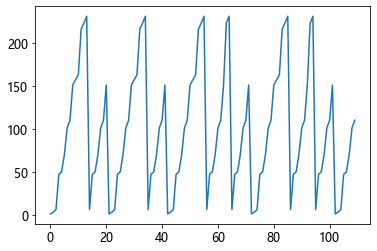

In [ ]:
import matplotlib.pyplot as plt  

plt.rcParams['font.family'] = 'Microsoft YaHei'   
plt.rcParams['font.size'] = 12  

df.收获.plot()   

<AxesSubplot:ylabel='Frequency'>

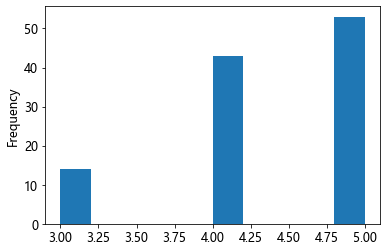

In [ ]:
df['评分'].plot(kind='hist')   

<AxesSubplot:xlabel='数量'>

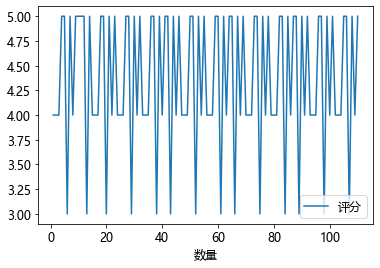

In [ ]:
df.plot(x='数量', y='评分')   

<AxesSubplot:>

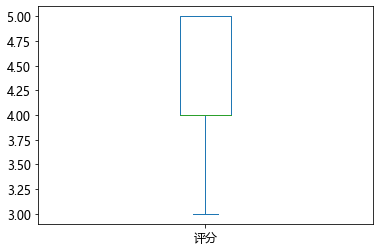

In [ ]:
df.评分.plot.box()  